<a href="https://colab.research.google.com/github/thai94/d2l/blob/main/3.linear-neural-networks/3_2_linear_regression_implementation_from_scratch_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import tensorflow as tf

In [28]:
def synthetic_data(w, b, num_examples):
  """Generate y = Xw + b + noise."""
  X = tf.zeros((num_examples, w.shape[0]))
  X += tf.random.normal(shape=X.shape)
  y = tf.matmul(X, tf.reshape(w, (-1,1))) + b
  y += tf.random.normal(shape=y.shape, stddev=0.01)
  return X, tf.reshape(y, (-1,1))

In [29]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [30]:
print('features: ', features[0], '\n label: ', labels[0])

features:  tf.Tensor([0.01878889 0.47237194], shape=(2,), dtype=float32) 
 label:  tf.Tensor([2.62941], shape=(1,), dtype=float32)


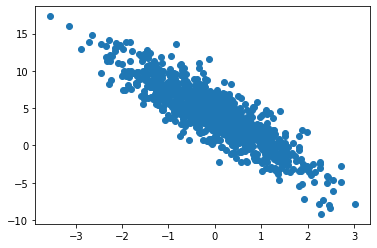

In [31]:
import matplotlib.pyplot as plt

plt.scatter(features[:, 1], labels[:, 0])
plt.show()

In [32]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = tf.constant(indices[i:min(i + batch_size, num_examples)])
    yield tf.gather(features, batch_indices), tf.gather(labels, batch_indices)

In [33]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tf.Tensor(
[[ 0.54342085 -0.856755  ]
 [-0.6457123   0.14984855]
 [ 0.02323383 -0.76414454]
 [ 1.1477833   1.520387  ]
 [-0.9176653  -0.10302742]
 [-1.7968208  -0.08933223]
 [-1.6531655  -0.25863275]
 [ 1.1658405   0.06637857]
 [-1.009345    0.2671858 ]
 [ 0.7570174  -1.2749861 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 8.213012  ]
 [ 2.4095318 ]
 [ 6.851566  ]
 [ 1.3291513 ]
 [ 2.7041771 ]
 [ 0.90186924]
 [ 1.7699664 ]
 [ 6.3104978 ]
 [ 1.2661213 ]
 [10.022358  ]], shape=(10, 1), dtype=float32)


In [35]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [36]:
def linreg(X, w, b):
  return tf.matmul(X, w) + b

In [37]:
def squared_loss(y_hat, y):
  return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [38]:
def sgd(params, grads, lr, batch_size):
  for param, grad in zip(params, grads):
    param.assign_sub(lr * grad/batch_size)

In [41]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as g:
      l = loss(net(X, w, b), y)
      dw, db = g.gradient(l, [w, b])
    sgd([w, b], [dw, db], lr, batch_size)
  train_l = loss(net(features, w, b), labels)
  print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050


In [42]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 2.683401e-04 -8.225441e-05]
error in estimating b: [0.00045681]
